In [1]:
# import liblary
import pandas as pd
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# membaca data
df = pd.read_csv(r'D:\SAHAM\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# melihat missing velue
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#data dictionary
#age : age in year
#sex : 1=male;0=female
#cp : chest pain type 0 to 3
#trestbps : resting blood pressure (in mm Hg on admission to the hospital)
#chol : serum cholestoral in mg/dl 
#fbs : (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)  
#restecg : resting electrocardiographic results 0 to 2
#thalach : maximum heart rate achieved 
#exang : exercise induced angina (1 = yes; 0 = no) 
#oldpeak : ST depression induced by exercise relative to rest 
#slope : the slope of the peak exercise ST segment 
#ca : number of major vessels (0-3) colored by flourosopy 
#thal : A blood disorder called thalassemia 
#target : Is patient have heart disease or not

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

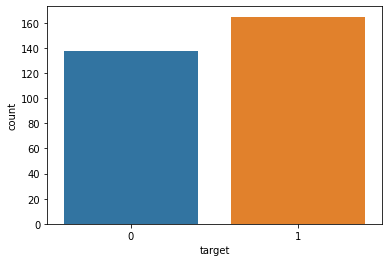

In [9]:
sn.countplot(df.target, data=df)

In [10]:
x = df.drop('target',1)
y = df['target']

In [11]:
from sklearn import preprocessing

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
X_nump = np.array(x)
# scaler = MinMaxScaler()
scaler = StandardScaler()

scaled = scaler.fit_transform(X_nump)
scaled = pd.DataFrame(scaled,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


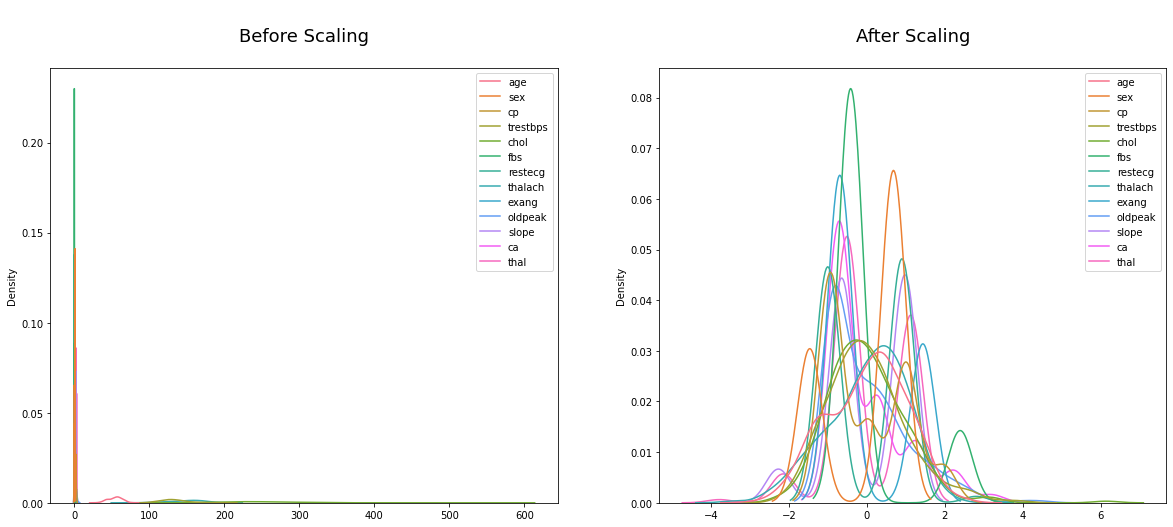

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,8))

sn.kdeplot(data=x, ax=ax1)
sn.kdeplot(data=scaled, ax=ax2)

ax1.set_title('\nBefore Scaling\n', fontsize=18)
ax2.set_title('\nAfter Scaling\n', fontsize=18)

plt.show();

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = scaled.copy()
# x = x.copy()
y = df['target']

In [18]:
x_train, x_test, y_train, y_test = train_test_split( x,y, test_size=0.1, random_state=42)

In [19]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [20]:
univariate = f_classif(x_train, y_train)
univariate

(array([17.7499218 , 22.88373273, 64.89615664,  5.5423601 ,  1.29140862,
         0.06860715,  4.37388484, 51.27661141, 64.8042919 , 61.78417268,
        36.97293702, 50.53815693, 36.70234791]),
 array([3.43737954e-05, 2.83494063e-06, 2.55287570e-14, 1.92781256e-02,
        2.56796138e-01, 7.93575377e-01, 3.74282401e-02, 7.61599481e-12,
        2.65065833e-14, 9.17739508e-14, 4.07465052e-09, 1.04515365e-11,
        4.60384939e-09]))

In [21]:
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

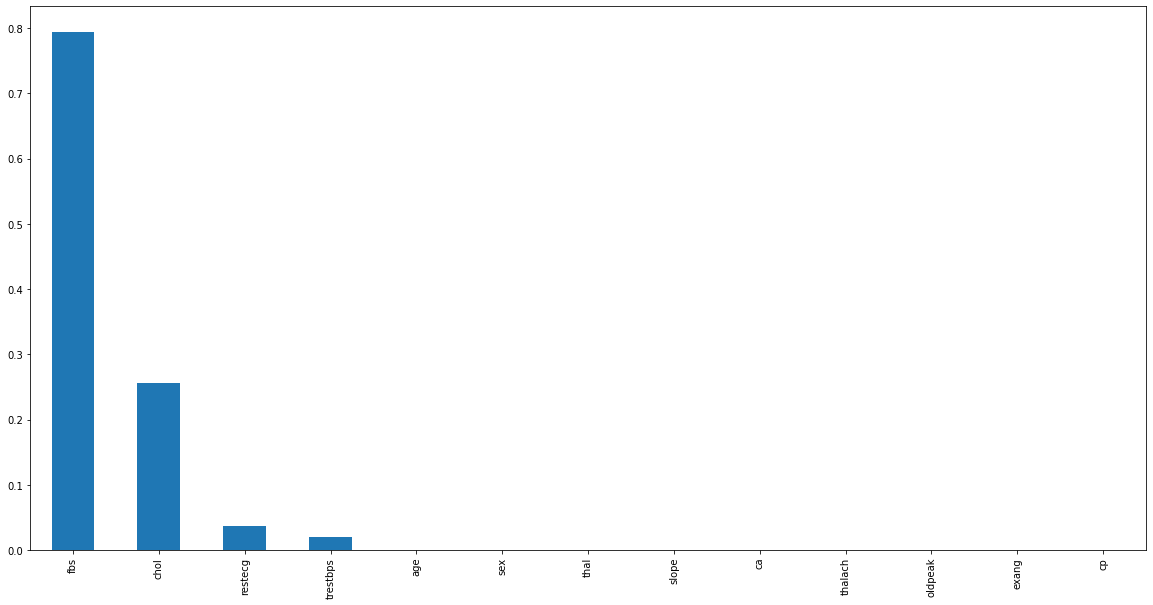

In [22]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 10))

In [23]:
data = pd.concat([x,y],1)
data = data.corr(method='pearson')

<AxesSubplot:>

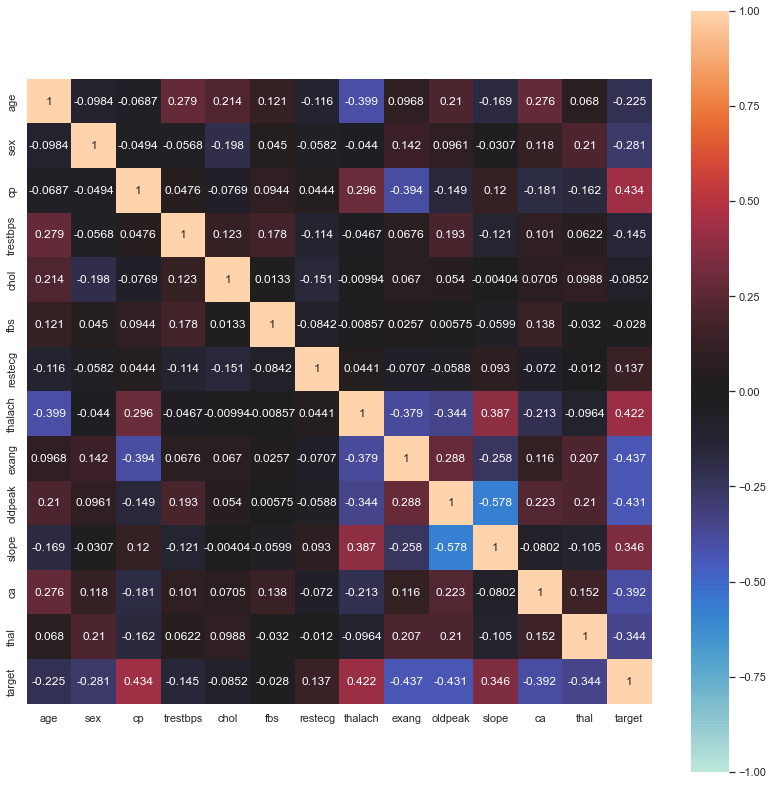

In [24]:
sn.set(rc = {'figure.figsize':(14,14)})
sn.heatmap(data, annot=True, fmt='.3g', vmax=1, vmin=-1, center=0, square=True)

In [25]:
sel_ = SelectKBest(f_classif, k=9).fit(x_train, y_train)
x_train.columns[sel_.get_support()]

Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')

In [26]:
x_train_k_best = sel_.transform(x_train)
# x_train = sel_.transform(x_train)
x_train_k_best.shape

(272, 9)

In [27]:
x_test_k_best = sel_.transform(x_test)
# x_test = sel_.transform(X_test)
x_test_k_best.shape

(31, 9)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [29]:
classifier_knn = Pipeline([
     ('pca', PCA()),
     ('model', KNeighborsClassifier()),
    
])

param_grid_knn = {             
               'model__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
               'model__metric': ['euclidean', 'manhattan', 'minkowski'],
               'model__weights': ['uniform', 'distance'],
               'model__p' : [1, 2],
               'pca__n_components' : [i for i in range(1,17)],
#                'pca__whiten': [True, False]
}

clf_knn = GridSearchCV(estimator=classifier_knn,           
                      param_grid=param_grid_knn, 
                      cv=5,
                      return_train_score=True,
                      n_jobs=-1
                  )

clf_knn.fit(x_train, y_train)

print("\nBest estimator:")
print()
print(clf_knn.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=12)),
                ('model',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7, p=1,
                                      weights='distance'))])


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [31]:
y_pred_knn_train = clf_knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Accuracy Training set: ", accuracy_knn_train)

y_pred_knn_test = clf_knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Accuracy Test set: ", accuracy_knn_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.8064516129032258


In [32]:
recall_knn_train = recall_score(y_train, y_pred_knn_train)
print("Recall Training set: ", recall_knn_train)

recall_knn_test = recall_score(y_test, y_pred_knn_test)
print("Recall Test set: ", recall_knn_test)

Recall Training set:  1.0
Recall Test set:  0.8235294117647058


In [33]:
precision_knn_train = precision_score(y_train, y_pred_knn_train)
print("Precision Training set: ", precision_knn_train)

precision_knn_test = precision_score(y_test, y_pred_knn_test)
print("Precision Test set: ", precision_knn_test)

Precision Training set:  1.0
Precision Test set:  0.8235294117647058


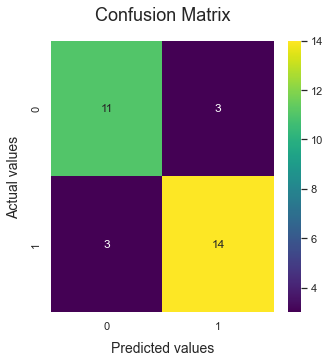

In [34]:
plt.figure(figsize=(5,5))
sn.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [35]:
classifier_dt = Pipeline([
    ('pca', PCA()),
    ('model', DecisionTreeClassifier()),
])

param_grid_dt = { 
    'model__criterion': ['entropy','gini'],
    'model__max_depth': np.arange(1,21),
    'model__min_samples_leaf': [1, 5, 10, 20, 50, 100],
    'model__min_samples_split': np.arange(2, 11),
    'pca__n_components' : [i for i in range(1,17)],
#     'pca__whiten': [True, False]
}

clf_dt = GridSearchCV(estimator=classifier_dt, param_grid=param_grid_dt, cv= 5, n_jobs=-1)
clf_dt.fit(x_train, y_train)

print("\nBest estimator:")
print()
print(clf_dt.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=5))])


In [36]:
y_pred_dt_train = clf_dt.predict(x_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Accuracy Training set: ", accuracy_dt_train)

y_pred_dt_test = clf_dt.predict(x_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Accuracy Test set: ", accuracy_dt_test)

Accuracy Training set:  0.7977941176470589
Accuracy Test set:  0.8387096774193549


In [37]:
recall_dt_train = recall_score(y_train, y_pred_dt_train)
print("Recall Training set: ", recall_dt_train)

recall_dt_test = recall_score(y_test, y_pred_dt_test)
print("Recall Test set: ", recall_dt_test)

Recall Training set:  0.9797297297297297
Recall Test set:  0.8823529411764706


In [38]:
precision_dt_train = precision_score(y_train, y_pred_dt_train)
print("Precision Training set: ", precision_dt_train)

precision_dt_test = precision_score(y_test, y_pred_dt_test)
print("Precision Test set: ", precision_dt_test)

Precision Training set:  0.7360406091370558
Precision Test set:  0.8333333333333334


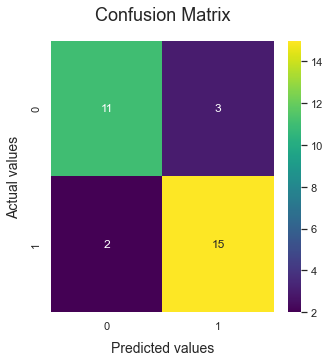

In [39]:
plt.figure(figsize=(5,5))
sn.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [40]:
classifier_sgd = Pipeline([
    ('pca', PCA()),
    ('model', SGDClassifier()),
])

param_grid_sgd = { 
    'model__loss': ['log', 'hinge', 'modified_huber', 'squared_hinge', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'model__penalty': ['elasticnet', 'l2', 'l1'],
    'model__alpha': [10 ** x for x in range(-6, 1)],
    'model__l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
    'pca__n_components' : [i for i in range(1,17)],
#     'pca__whiten': [True, False]
}

clf_sgd = GridSearchCV(estimator=classifier_sgd, param_grid=param_grid_sgd, cv= 5, n_jobs=-1)
clf_sgd.fit(x_train, y_train)

print("\nBest estimator:")
print()
print(clf_sgd.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=9)),
                ('model',
                 SGDClassifier(alpha=0.001, l1_ratio=0.95, loss='log',
                               penalty='elasticnet'))])


In [41]:
y_pred_sgd_train = clf_sgd.predict(x_train)
accuracy_sgd_train = accuracy_score(y_train, y_pred_sgd_train)
print("Accuracy Training set: ", accuracy_sgd_train)

y_pred_sgd_test = clf_sgd.predict(x_test)
accuracy_sgd_test = accuracy_score(y_test, y_pred_sgd_test)
print("Accuracy Test set: ", accuracy_sgd_test)

Accuracy Training set:  0.8492647058823529
Accuracy Test set:  0.8064516129032258


In [42]:
recall_sgd_train = recall_score(y_train, y_pred_sgd_train)
print("Recall Training set: ", recall_sgd_train)

recall_sgd_test = recall_score(y_test, y_pred_sgd_test)
print("Recall Test set: ", recall_sgd_test)

Recall Training set:  0.8716216216216216
Recall Test set:  0.8235294117647058


In [43]:
precision_sgd_train = precision_score(y_train, y_pred_sgd_train)
print("Precision Training set: ", precision_sgd_train)

precision_sgd_test = precision_score(y_test, y_pred_sgd_test)
print("Precision Test set: ", precision_sgd_test)

Precision Training set:  0.8543046357615894
Precision Test set:  0.8235294117647058


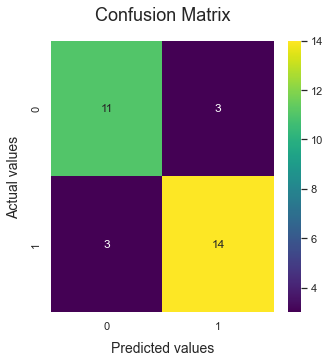

In [44]:
plt.figure(figsize=(5,5))
sn.heatmap(confusion_matrix(y_test, y_pred_sgd_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [45]:
classifier_lr = Pipeline([
    ('pca', PCA()),
    ('model', LogisticRegression(random_state=30)),
])

param_grid_lr = {
               'model__solver': ['newton-cg', 'lbfgs','sag', 'saga', 'liblinear'],
               'model__C':[0.5,1,1.5,2,2.5],
               'model__class_weight':[None,'balanced'],
               'model__max_iter':[1000,2000,3000],
               'model__penalty':[None, 'l1','l2', 'elasticnet'],
               'model__intercept_scaling' : [True, False],
               'pca__n_components' : [i for i in range(1,17)],
#                'pca__whiten': [True, False]
}

clf_lr = GridSearchCV(estimator=classifier_lr, param_grid=param_grid_lr, cv= 5, n_jobs=-1)
clf_lr.fit(x_train, y_train)

print("\nBest estimator:")
print()
print(clf_lr.best_estimator_)


Best estimator:

Pipeline(steps=[('pca', PCA(n_components=4)),
                ('model',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    intercept_scaling=True, max_iter=1000,
                                    penalty='l1', random_state=30,
                                    solver='liblinear'))])


In [47]:
y_pred_lr_train = clf_lr.predict(x_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Accuracy Training set: ", accuracy_lr_train)

y_pred_lr_test = clf_lr.predict(x_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Accuracy Test set: ", accuracy_lr_test)

Accuracy Training set:  0.8419117647058824
Accuracy Test set:  0.8387096774193549


In [48]:
recall_lr_train = recall_score(y_train, y_pred_lr_train)
print("Recall Training set: ", recall_lr_train)

recall_lr_test = recall_score(y_test, y_pred_lr_test)
print("Recall Test set: ", recall_lr_test)

Recall Training set:  0.8783783783783784
Recall Test set:  0.8823529411764706


In [49]:
precision_lr_train = precision_score(y_train, y_pred_lr_train)
print("Precision Training set: ", precision_lr_train)

precision_lr_test = precision_score(y_test, y_pred_lr_test)
print("Precision Test set: ", precision_lr_test)

Precision Training set:  0.8387096774193549
Precision Test set:  0.8333333333333334


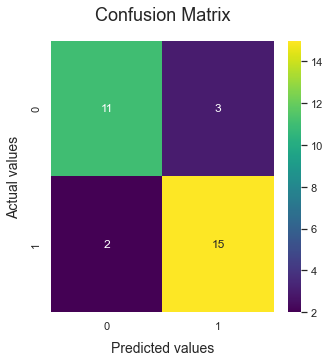

In [50]:
plt.figure(figsize=(5,5))
sn.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [51]:
models = [
          ('Decision Tree', accuracy_dt_train, accuracy_dt_test),
          ('K-Nearest Neighbors', accuracy_knn_train, accuracy_knn_test),
          ('SGD Classifier', accuracy_sgd_train, accuracy_sgd_test),
          ('Logistic Regression', accuracy_lr_train, accuracy_lr_test)
         ]

In [52]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree,0.797794,0.838710
1,K-Nearest Neighbors,1.000000,0.806452
2,SGD Classifier,0.849265,0.806452
3,Logistic Regression,0.841912,0.838710


In [53]:
models_comparison = [
                        ('Decision Tree', accuracy_dt_test, recall_dt_test, precision_dt_test),
                        ('K-Nearest Neighbors', accuracy_knn_test, recall_knn_test, precision_knn_test),
                        ('SGD Classifier', accuracy_sgd_test, recall_sgd_test, precision_sgd_test),
                        ('Logistic Regression', accuracy_lr_test, recall_lr_test, precision_lr_test)
                    ]

In [54]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree,0.838710,0.882353,0.833333
1,K-Nearest Neighbors,0.806452,0.823529,0.823529
2,SGD Classifier,0.806452,0.823529,0.823529
3,Logistic Regression,0.838710,0.882353,0.833333


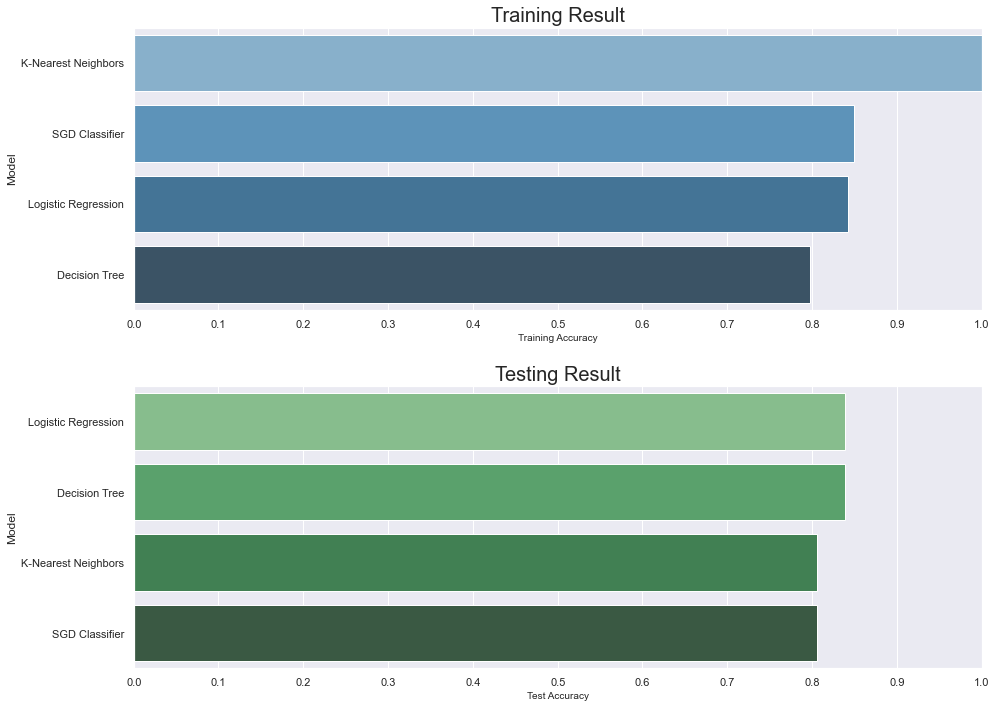

In [55]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sn.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy\n', size=10)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
axes[0].set_title('Training Result', fontsize=20)

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sn.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=10)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
axes[1].set_title('Testing Result', fontsize=20)

plt.tight_layout()
plt.show()